### Problem Statement

Through a real-world challenge, this hackathon aims to enhance competitors' data science and innovative analytical thinking abilities. Get an opportunity to work on a remarkable data science technology by competing with the best brains in this area at this point in time, where artificial intelligence and machine learning are at the forefront of attention, and find out how you stack up!

This hackathon will try to address the challenges faced by taxi operators in quoting the right fare to customers before starting the trip. However, the details are shared with taxi drivers or operators related to the trip, they find it difficult to quote the right fare because of uncertainties and calculation complexities. The same issue is faced by passengers as well because of inaccurate or irrelevant fares quoted. To find a solution for this, this hackathon provides a historical dataset to participants that includes records of taxi trip details and fares of those trips. Using this dataset, the participants need to build machine learning models for predicting the trip fare based on the given other useful features of the trip.

Overall, it involves using a dataset, finding the best set of features from the dataset, building a machine learning model to predict trip fare based on other trip features and evaluating the predictions using mean squared error and finally submitting the predictions in the given template.

The competition can be accessed using the link: https://machinehack.com/hackathons/iiit_nr_taxi_trip_fare_prediction_challenge/overview

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', 100)

In [4]:
train = pd.read_csv("~/Downloads/taxifare_train.csv")
test = pd.read_csv("~/Downloads/taxifare_test.csv")

submission = pd.read_csv("~/Downloads/submission_taxifare.csv")

In [5]:
train.shape, test.shape

((35000, 20), (15000, 19))

In [6]:
train.head()

,trip_distance,rate_code,store_and_fwd_flag,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,imp_surcharge,total_amount,pickup_location_id,dropoff_location_id,year,month,day,day_of_week,hour_of_day,trip_duration,calculated_total_amount
0,9.01,1,N,1,26.0,0.0,0.5,8.14,5.76,0.3,40.70,262,138,2018,3,7,2,6,2131.0,24.30
1,0.20,1,N,1,3.0,0.0,0.5,0.75,0.00,0.3,4.55,263,236,2018,2,25,6,10,2377.0,37.40
2,9.65,1,N,1,41.5,0.0,0.5,9.61,5.76,0.3,57.67,138,230,2018,1,29,0,8,1286.0,30.36
3,9.50,1,N,1,30.0,0.5,0.5,9.25,5.76,0.3,46.31,186,138,2018,9,25,1,20,2586.0,4.30
4,5.80,1,N,1,21.5,0.5,0.5,4.56,0.00,0.3,27.36,162,87,2018,8,20,0,21,1575.0,23.80


In [111]:
# Univariate Analysis

combined = pd.concat([train, test], ignore_index = True)

In [12]:
num_cols = combined.select_dtypes(include = np.number).columns

In [13]:
num_cols

Index(['trip_distance', 'rate_code', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'imp_surcharge',
       'total_amount', 'pickup_location_id', 'dropoff_location_id', 'year',
       'month', 'day', 'day_of_week', 'hour_of_day', 'trip_duration',
       'calculated_total_amount'],
      dtype='object')

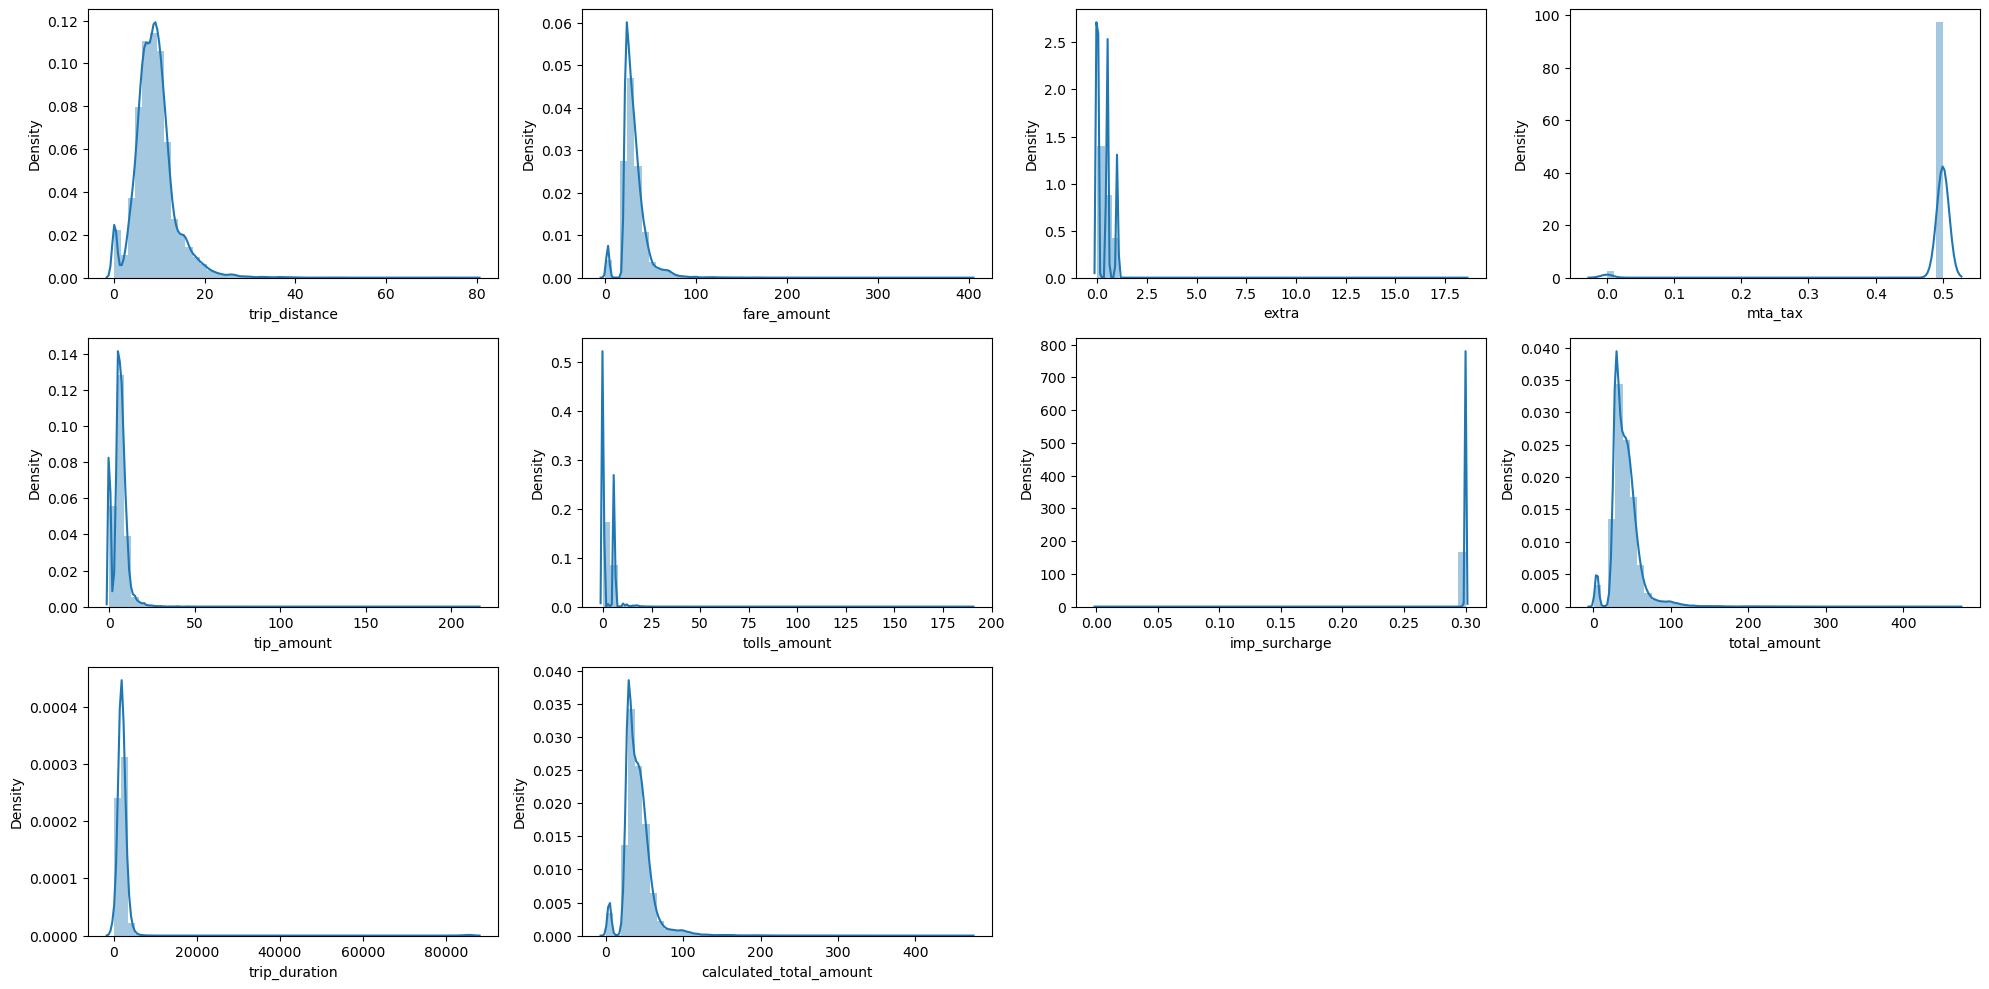

In [15]:
numeric_cols = ['trip_distance',  'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'imp_surcharge',
       'total_amount',  'trip_duration',
       'calculated_total_amount']

nrows = 3
ncols = 4
iterator = 1

plt.figure(figsize = (20, 10))
for i in numeric_cols:
    plt.subplot(nrows, ncols, iterator)
    sns.distplot(combined.loc[:, i])
    iterator+=1
    
plt.tight_layout()
plt.show()

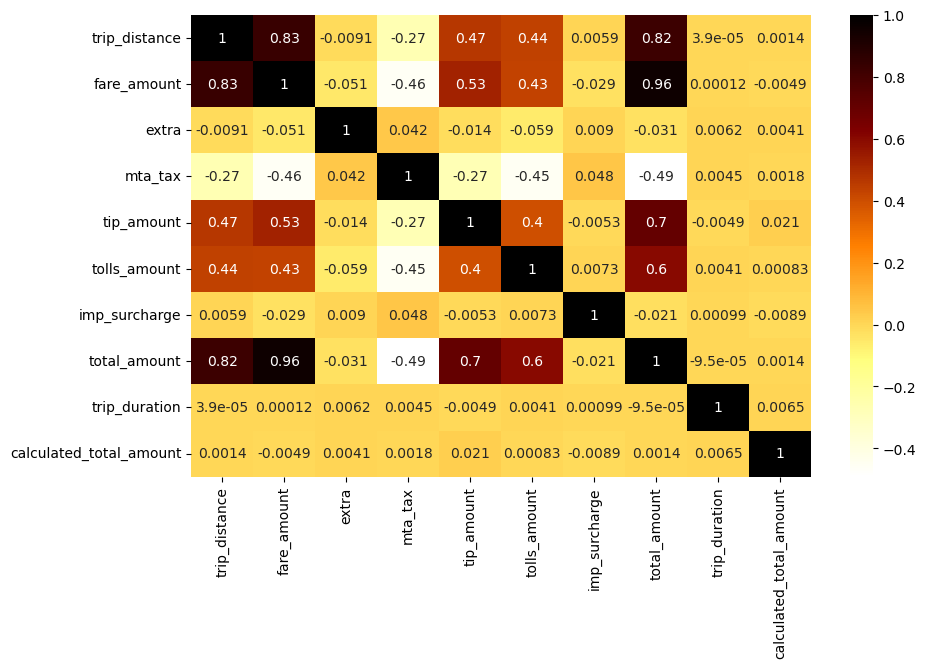

In [18]:
# Check the Correlation between the Numerical Vars

plt.figure(figsize = (10, 6))
sns.heatmap(combined.loc[:, numeric_cols].corr(), annot = True, 
            cmap = "afmhot_r")

plt.show()

# Total Amount ~ Trip Distance+Fare_amount+Tip_Amount+Toll

In [21]:
# Lets Look into Cat Vars...

cat_cols = ['rate_code', 'store_and_fwd_flag',
           'payment_type', 'pickup_location_id',
       'dropoff_location_id',  'year', 'month', 'day', 'day_of_week',
       'hour_of_day']

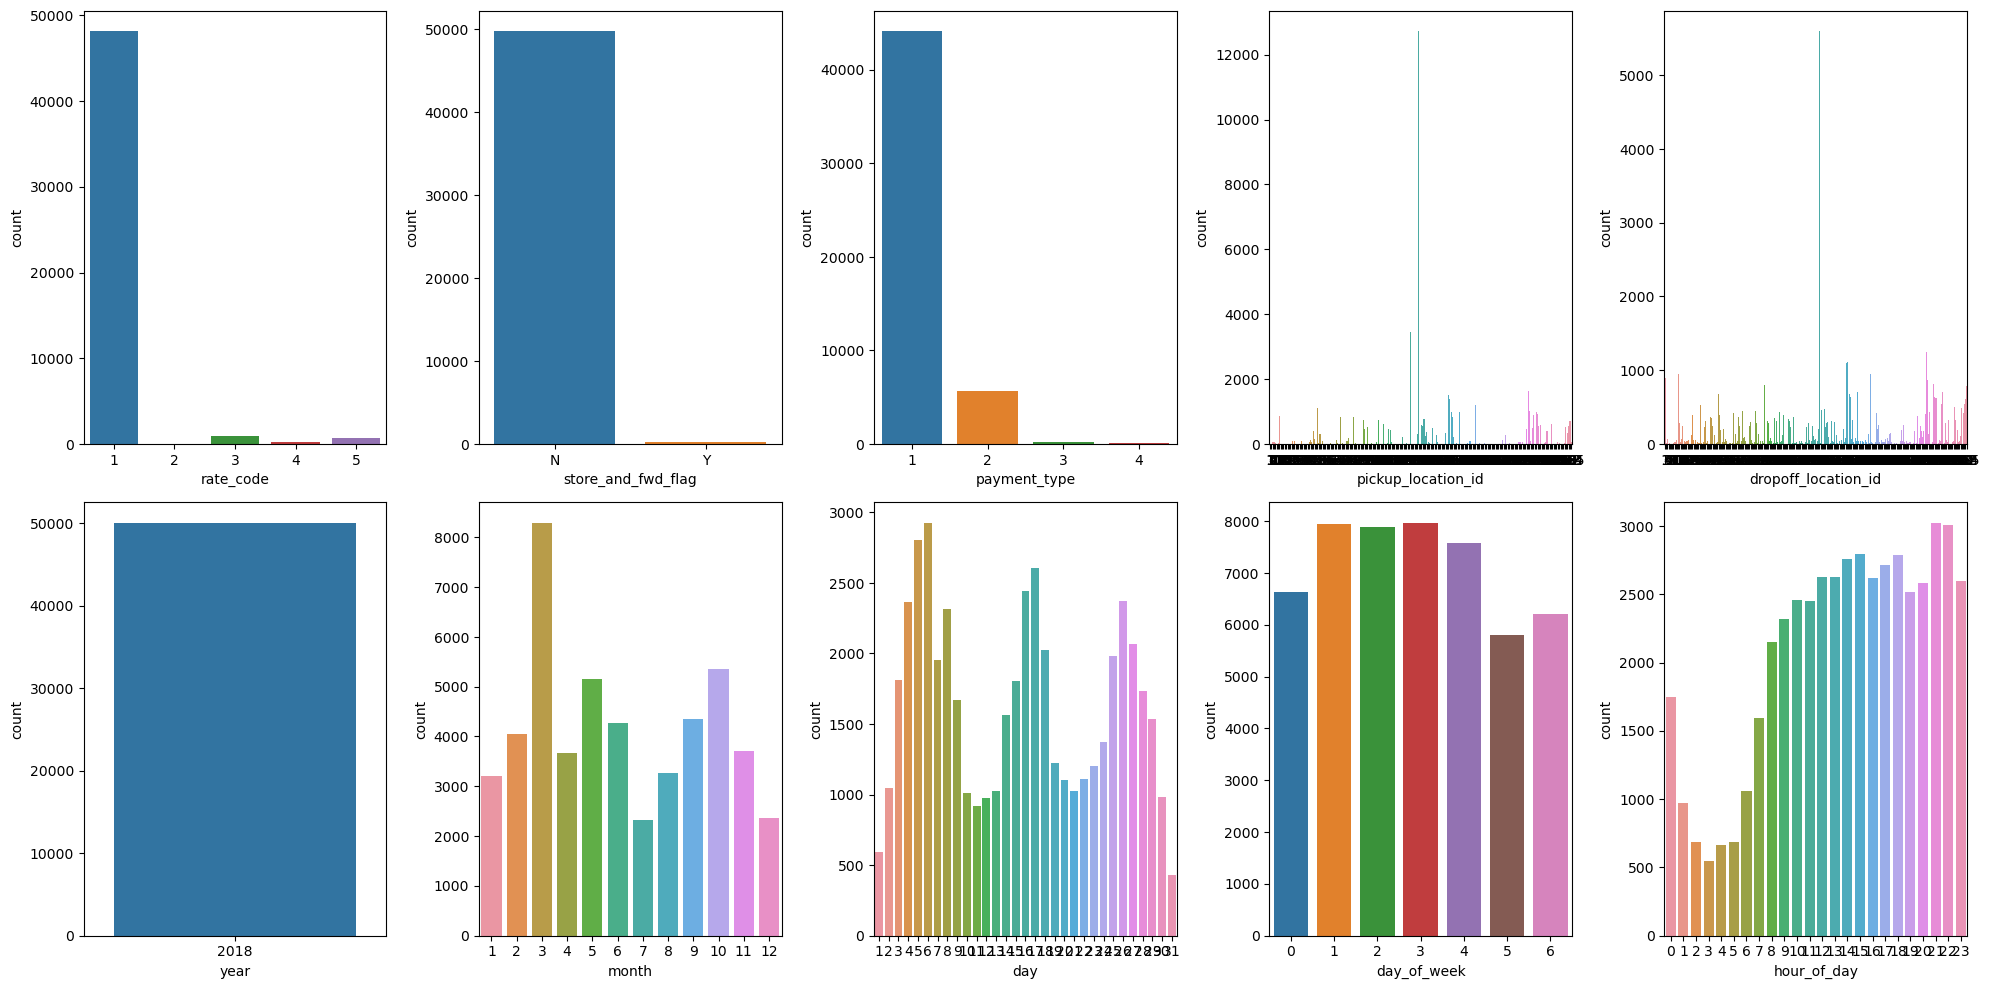

In [23]:
nrows = 2
ncols = 5
iterator = 1

plt.figure(figsize = (20, 10))
for i in cat_cols:
    plt.subplot(nrows, ncols, iterator)
    sns.countplot(combined.loc[:, i])
    iterator+=1
    
plt.tight_layout()
plt.show()

In [25]:
# Submit the base Model...

submission["calculated_total_amount"] = \
train.calculated_total_amount.mean()

In [26]:
submission.to_csv("Basemodel_taxiFare.csv", index = False) # 19.18025

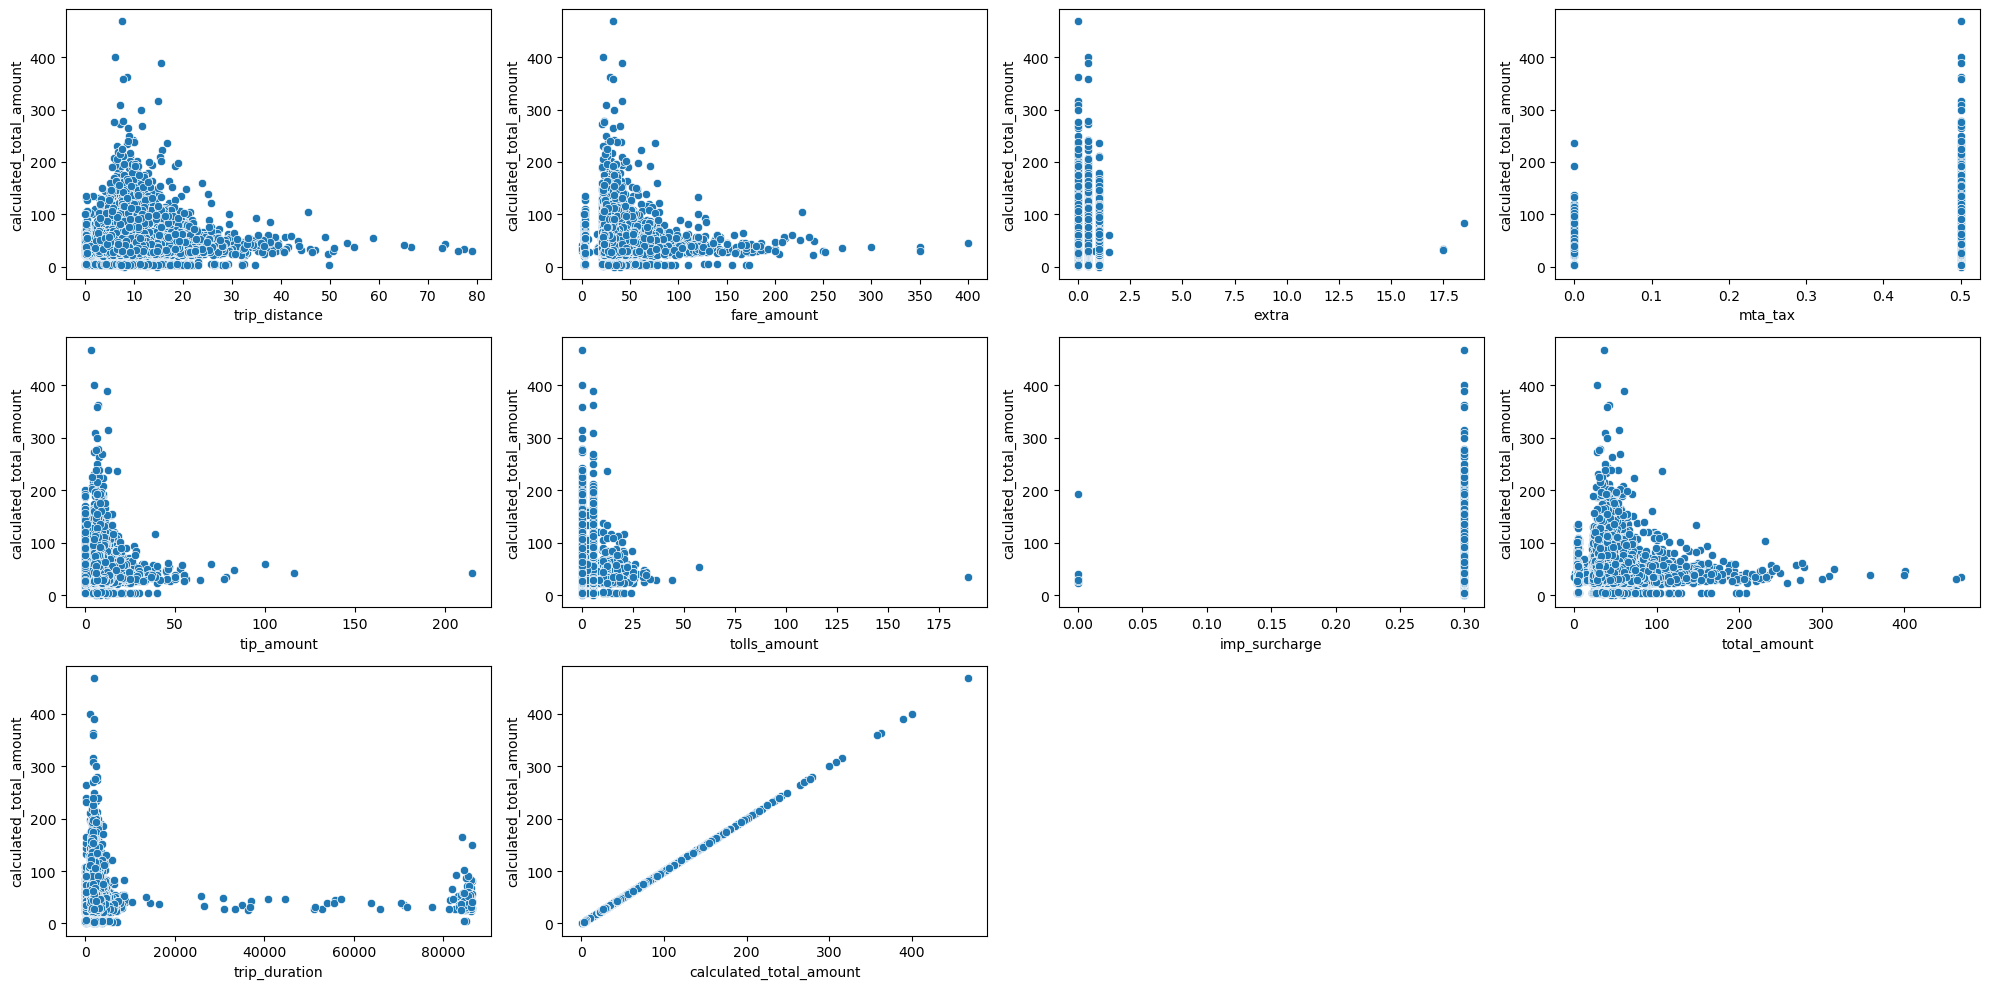

In [28]:
# Bivariate Analysis - num vs num
nrows = 3
ncols = 4
iterator = 1

plt.figure(figsize = (20, 10))
for i in numeric_cols:
    plt.subplot(nrows, ncols, iterator)
    sns.scatterplot(combined.loc[:, i], combined.calculated_total_amount)
    iterator+=1
    
plt.tight_layout()
plt.show()


Note: We will have to remove the Outliers in the Data

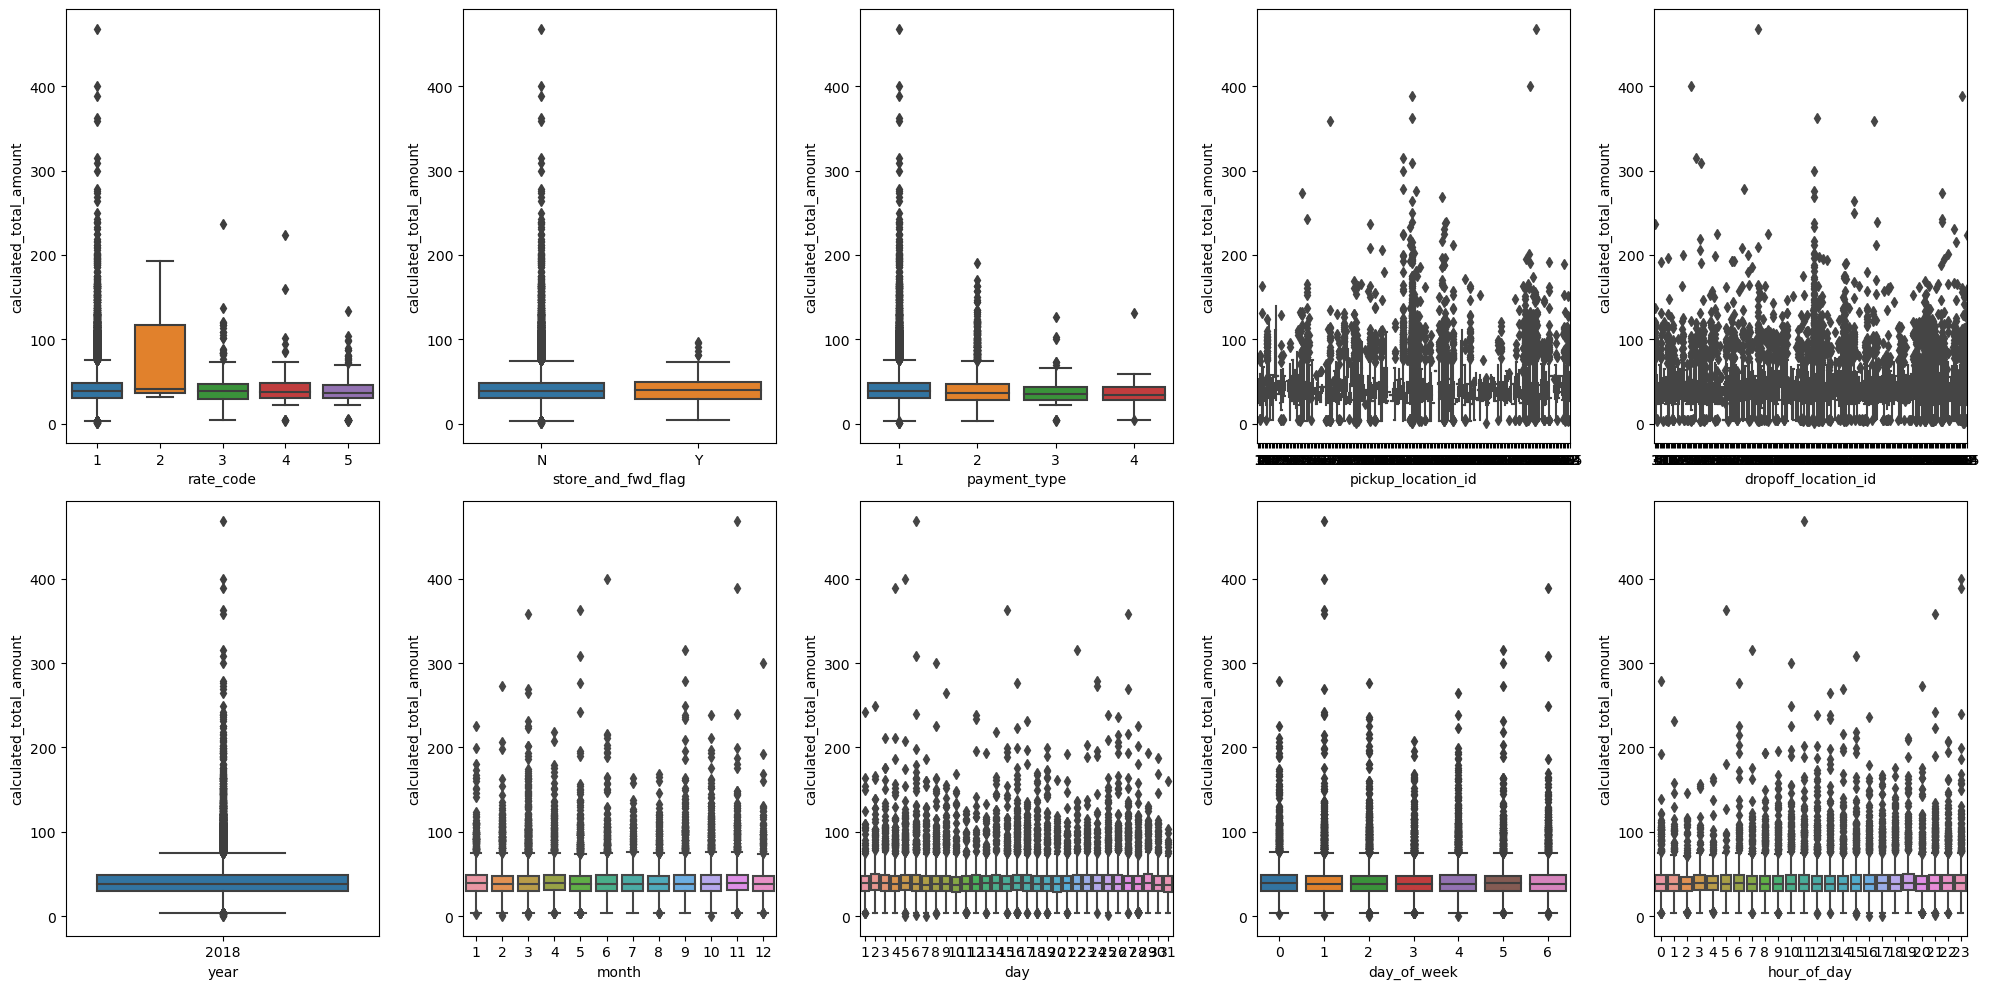

In [30]:
# Cat vs Num
nrows = 2
ncols = 5
iterator = 1

plt.figure(figsize = (20, 10))

for i in cat_cols:
    plt.subplot(nrows, ncols, iterator)
    sns.boxplot(combined.loc[:, i], combined.calculated_total_amount)
    iterator+=1
    
plt.tight_layout()
plt.show()

In [31]:
# Check for the Missing Values
combined.isnull().sum()

trip_distance                  0
rate_code                      0
store_and_fwd_flag             0
payment_type                   0
fare_amount                    0
extra                          0
mta_tax                        0
tip_amount                     0
tolls_amount                   0
imp_surcharge                  0
total_amount                   0
pickup_location_id             0
dropoff_location_id            0
year                           0
month                          0
day                            0
day_of_week                    0
hour_of_day                    0
trip_duration                  0
calculated_total_amount    15000
dtype: int64

In [32]:
combined.head()

,trip_distance,rate_code,store_and_fwd_flag,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,imp_surcharge,total_amount,pickup_location_id,dropoff_location_id,year,month,day,day_of_week,hour_of_day,trip_duration,calculated_total_amount
0,9.01,1,N,1,26.0,0.0,0.5,8.14,5.76,0.3,40.70,262,138,2018,3,7,2,6,2131.0,24.30
1,0.20,1,N,1,3.0,0.0,0.5,0.75,0.00,0.3,4.55,263,236,2018,2,25,6,10,2377.0,37.40
2,9.65,1,N,1,41.5,0.0,0.5,9.61,5.76,0.3,57.67,138,230,2018,1,29,0,8,1286.0,30.36
3,9.50,1,N,1,30.0,0.5,0.5,9.25,5.76,0.3,46.31,186,138,2018,9,25,1,20,2586.0,4.30
4,5.80,1,N,1,21.5,0.5,0.5,4.56,0.00,0.3,27.36,162,87,2018,8,20,0,21,1575.0,23.80


### Feature Engineering

<AxesSubplot:xlabel='day_of_week', ylabel='calculated_total_amount'>

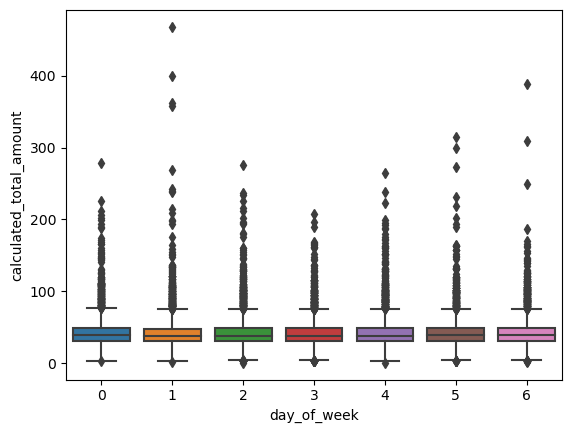

In [33]:
# Day of the Week
sns.boxplot(x = "day_of_week", y = "calculated_total_amount",
           data = combined)

<AxesSubplot:xlabel='calculated_total_amount', ylabel='hour_of_day'>

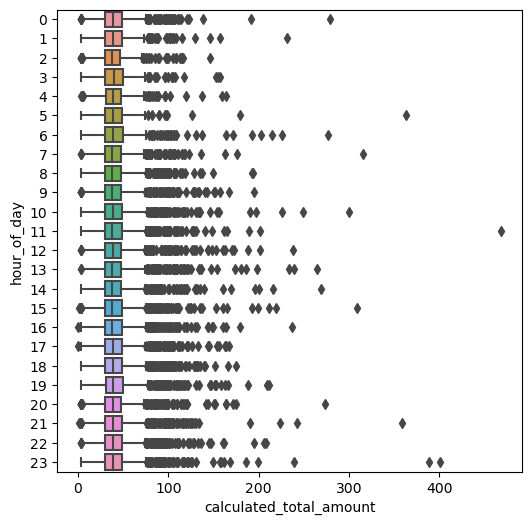

In [45]:
# Day of the Week
plt.figure(figsize = (6, 6))
sns.boxplot(y = "hour_of_day", x = "calculated_total_amount",
           data = combined, orient = "h")

In [112]:
# Busy Hours...Peak Hours...5, 10, 11, 15, 16, 19, 20, 21, 22, 23

combined["peak_hours"] = combined.hour_of_day.apply(lambda x:1 if x in [5, 10, 11, 15, 
                                               16, 19, 20, 21, 22, 23] \
                           else 0)

<AxesSubplot:xlabel='peak_hours', ylabel='calculated_total_amount'>

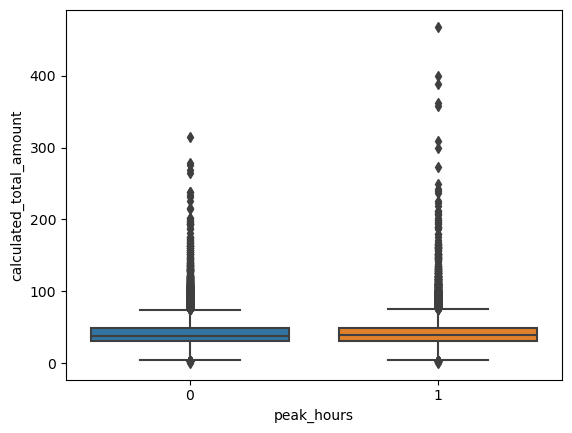

In [50]:
# Lets check if this variable has any pattern
sns.boxplot(x = "peak_hours", 
            y = "calculated_total_amount", 
            data = combined)

<AxesSubplot:xlabel='calculated_total_amount'>

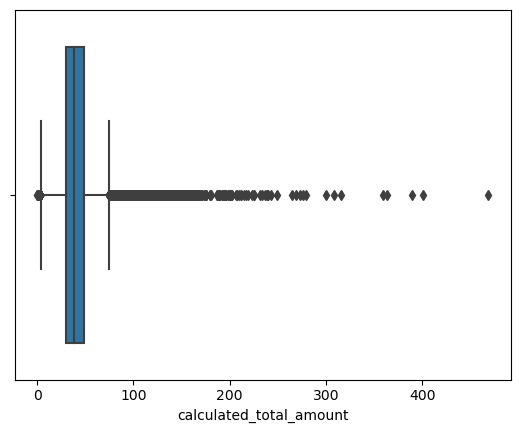

In [51]:
# Remove the Outliers from the Data
sns.boxplot(combined.calculated_total_amount)

In [52]:
# Remove the Outliers
q1 = combined.quantile(0.25)
q3 = combined.quantile(0.75)

iqr = q3-q1

lower_lim = q1-1.5*iqr
upper_lim = q3+1.5*iqr

In [53]:
#combined.loc[~((combined<lower_lim) |\
               #(combined>upper_lim)).any(axis = 1)].shape

(33577, 21)

In [113]:
# Clustering...
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
kmeans = KMeans(random_state = 42)
elbow = KElbowVisualizer(estimator=kmeans, random_state = 42)

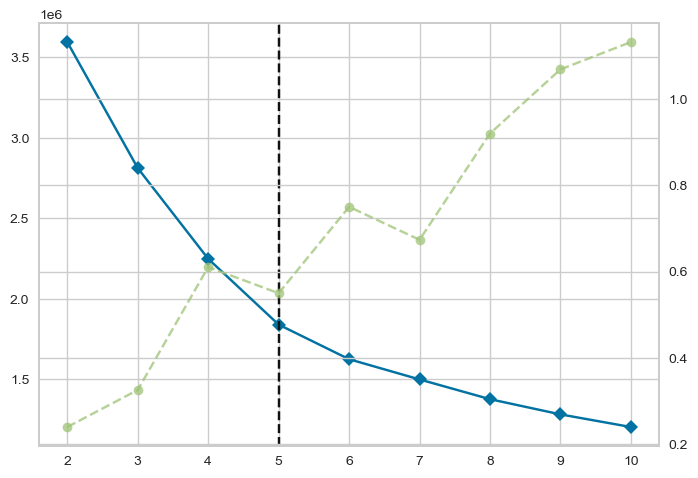

In [114]:
# hour of the day, day of the week, month, day
data = combined.loc[:, ['month', 'day', 'day_of_week',
       'hour_of_day']]

# Fit the Elbow
elbow.fit(data)
plt.show() # Gives me the number of clusters ==5

In [115]:
# Fitting the Clusters and generating the Labels...
kmeans = KMeans(n_clusters=5, random_state = 42)
labels = kmeans.fit(data)

combined["cluster_labels"] = labels.labels_

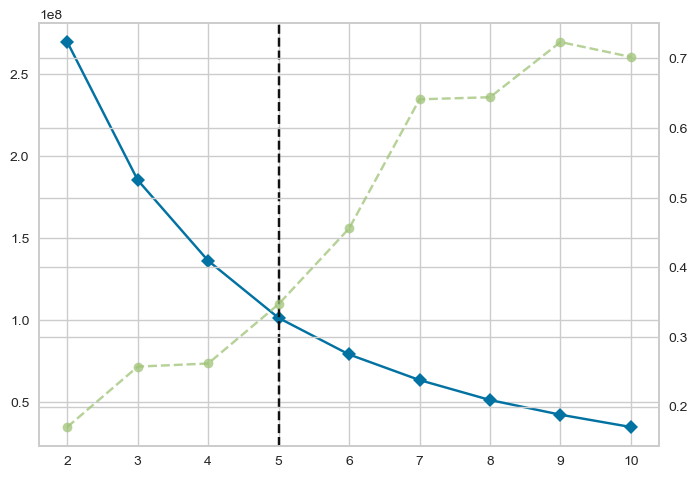

In [116]:
# Lets check the Clusters for Lat and Long...
kmeans = KMeans(random_state = 0)
elbow = KElbowVisualizer(estimator=kmeans, random_state = 0)

data = combined.loc[:, ['pickup_location_id', 
                        'dropoff_location_id']]

# Fit the Elbow
elbow.fit(data)
plt.show() # Gives me the

In [117]:
kmeans = KMeans(n_clusters=3, random_state = 42)
labels = kmeans.fit(data)

combined["geo_labels"] = labels.labels_

In [118]:
combined.head()

,trip_distance,rate_code,store_and_fwd_flag,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,imp_surcharge,total_amount,pickup_location_id,dropoff_location_id,year,month,day,day_of_week,hour_of_day,trip_duration,calculated_total_amount,peak_hours,cluster_labels,geo_labels
0,9.01,1,N,1,26.0,0.0,0.5,8.14,5.76,0.3,40.70,262,138,2018,3,7,2,6,2131.0,24.30,0,2,0
1,0.20,1,N,1,3.0,0.0,0.5,0.75,0.00,0.3,4.55,263,236,2018,2,25,6,10,2377.0,37.40,1,1,0
2,9.65,1,N,1,41.5,0.0,0.5,9.61,5.76,0.3,57.67,138,230,2018,1,29,0,8,1286.0,30.36,0,1,2
3,9.50,1,N,1,30.0,0.5,0.5,9.25,5.76,0.3,46.31,186,138,2018,9,25,1,20,2586.0,4.30,1,3,0
4,5.80,1,N,1,21.5,0.5,0.5,4.56,0.00,0.3,27.36,162,87,2018,8,20,0,21,1575.0,23.80,1,4,1


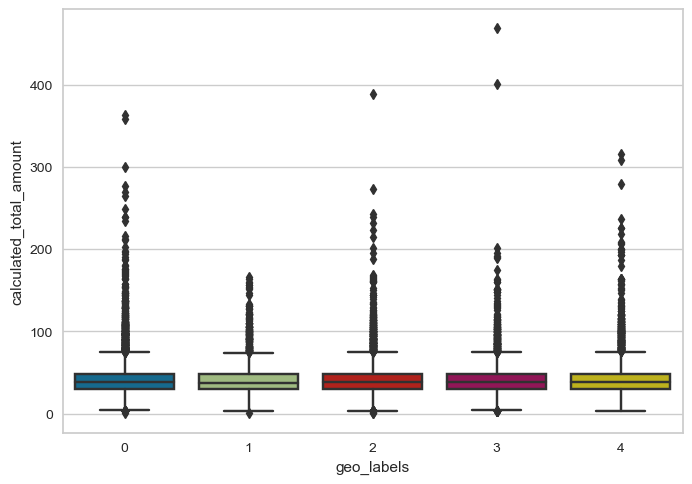

In [72]:
sns.boxplot(x = "geo_labels", y = "calculated_total_amount",
           data = combined)
plt.show()

In [73]:
combined.groupby("geo_labels")["calculated_total_amount"].describe()

,count,mean,std,min,25%,50%,75%,max
geo_labels,,,,,,,,
0,10933.0,41.515504,19.676708,0.31,30.36,38.47,48.30,362.80
1,3635.0,40.714446,17.894377,0.90,29.80,37.72,47.80,165.80
2,7421.0,41.427380,18.832186,0.31,30.35,38.76,48.36,389.12
3,5170.0,41.184352,19.330151,3.30,30.30,38.16,48.07,468.35
4,7841.0,41.334905,19.221779,3.30,30.29,38.30,48.36,315.38


In [77]:
# lat and Longitude...
 # 138~Queens, 132~Queens, 230~Manhattan, 161~Manhattan, 162~Manhattan
combined.pickup_location_id.nunique()

224

In [119]:
#Import the code file
geolocs = pd.read_csv("C:/Users/IT/Downloads/taxi_zone_lookup.csv")

In [120]:
manhattan_list = geolocs.loc[geolocs.Borough=="Manhattan", 
                             "LocationID"].to_list()

queens_list = geolocs.loc[geolocs.Borough=="Queens", 
                             "LocationID"].to_list()

In [121]:
def locs(x):
    if x in manhattan_list:
        return("Manhattan")
    elif x in queens_list:
        return("Queens")
    else:
        return("Others")

In [122]:
combined["locations"] = combined.pickup_location_id.apply(locs)

In [124]:
# Count of Trips
combined["trip_count"] = combined.groupby("pickup_location_id")\
["dropoff_location_id"].transform("nunique")

In [126]:
# Fare Per Mile
combined["fare_per_mile"] = \
combined["total_amount"]/combined["trip_distance"] 

In [129]:
# Median Fare Per Day
combined["med_fare_pd"] = \
combined.groupby("day")["total_amount"].transform("median")

In [130]:
# Mean Fare Per Day
combined["mean_fare_pd"] = \
combined.groupby("day")["total_amount"].transform("mean")

In [131]:
# per day SD
combined["std_fare_pd"] = \
combined.groupby("day")["total_amount"].transform("std")

In [132]:
# Min and Max Fare Per Day
combined["min_fare_pd"] = \
combined.groupby("day")["total_amount"].transform("min")

combined["max_fare_pd"] = \
combined.groupby("day")["total_amount"].transform("max")

In [134]:
# Min Fare Per Month
combined["min_fare_pm"] = \
combined.groupby("month")["total_amount"].transform("min")

# Max Fare Per Month
combined["max_fare_pm"] = \
combined.groupby("month")["total_amount"].transform("max")

# Mean Fare Per Month
combined["mean_fare_pm"] = \
combined.groupby("month")["total_amount"].transform("mean")

# Median Fare Per Month
combined["median_fare_pm"] = \
combined.groupby("month")["total_amount"].transform("median")

In [135]:
# SD Fare Per Month
combined["std_fare_pm"] = \
combined.groupby("month")["total_amount"].transform("std")

In [136]:
combined.head()

,trip_distance,rate_code,store_and_fwd_flag,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,imp_surcharge,total_amount,pickup_location_id,dropoff_location_id,year,month,day,day_of_week,hour_of_day,trip_duration,calculated_total_amount,peak_hours,cluster_labels,geo_labels,locations,trip_count,fare_per_mile,med_fare_pd,mean_fare_pd,std_fare_pd,min_fare_pd,max_fare_pd,min_fare_pm,max_fare_pm,mean_fare_pm,median_fare_pm,std_fare_pm
0,9.01,1,N,1,26.0,0.0,0.5,8.14,5.76,0.3,40.70,262,138,2018,3,7,2,6,2131.0,24.30,0,2,0,Manhattan,74,4.517203,37.30,41.038485,22.624294,3.30,389.12,3.30,400.80,42.229679,39.56,20.227974
1,0.20,1,N,1,3.0,0.0,0.5,0.75,0.00,0.3,4.55,263,236,2018,2,25,6,10,2377.0,37.40,1,1,0,Manhattan,119,22.750000,41.58,43.977707,17.755548,3.96,227.30,3.30,299.96,40.589817,38.16,18.533970
2,9.65,1,N,1,41.5,0.0,0.5,9.61,5.76,0.3,57.67,138,230,2018,1,29,0,8,1286.0,30.36,0,1,2,Queens,218,5.976166,39.07,41.691287,17.623236,3.30,174.30,0.31,276.38,40.487607,37.94,19.817582
3,9.50,1,N,1,30.0,0.5,0.5,9.25,5.76,0.3,46.31,186,138,2018,9,25,1,20,2586.0,4.30,1,3,0,Manhattan,169,4.874737,41.58,43.977707,17.755548,3.96,227.30,3.30,220.00,42.174584,39.03,18.121382
4,5.80,1,N,1,21.5,0.5,0.5,4.56,0.00,0.3,27.36,162,87,2018,8,20,0,21,1575.0,23.80,1,4,1,Manhattan,152,4.717241,36.00,39.290653,19.530189,3.30,266.56,0.31,266.56,41.322749,38.81,18.262239


In [137]:
# Payment Type
combined.groupby('payment_type')["total_amount"].describe()

,count,mean,std,min,25%,50%,75%,max
payment_type,,,,,,,,
1,44109.0,42.729747,19.110126,3.30,31.00,39.67,49.27,468.35
2,5654.0,31.765354,16.861645,0.31,24.30,29.30,38.80,238.44
3,179.0,25.883799,21.345574,0.31,4.30,26.80,36.05,170.29
4,58.0,32.293276,28.497052,3.30,23.05,30.55,43.74,200.30


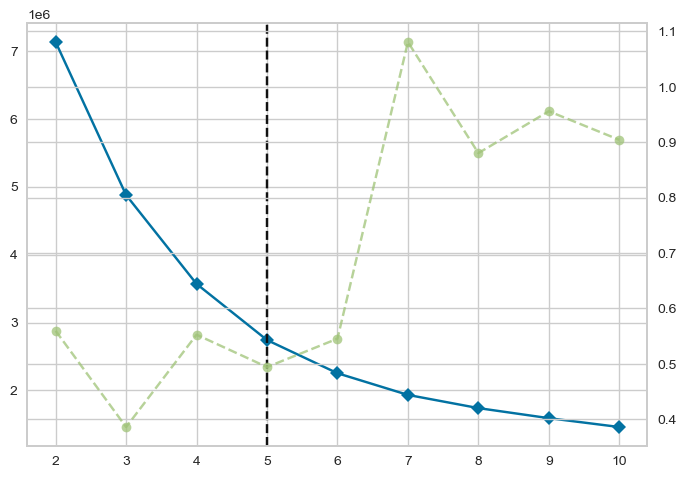

In [138]:
# Cluster Centroid for fare amount...surcharge...
kmeans = KMeans(random_state = 42)
elbow = KElbowVisualizer(estimator = kmeans, random_state = 42)

data = combined.loc[:, ['fare_amount', "extra", "mta_tax",
                       "tip_amount", "tolls_amount",
                       "imp_surcharge"]]

elbow.fit(data)
plt.show()

In [139]:
# Fit the Clusters ==3 and generate the centroids
kmeans = KMeans(n_clusters = 3, random_state = 42)

centres = kmeans.fit(data)
combined["fare_centres"] = centres.labels_

In [104]:
import statsmodels.formula.api as sfa

model = sfa.ols("calculated_total_amount~fare_centres", 
                data = combined).fit()

In [107]:
from statsmodels.stats.anova import anova_lm
print(anova_lm(model))

                   df        sum_sq     mean_sq         F    PR(>F)
fare_centres      1.0  1.497978e+02  149.797791  0.407744  0.523121
Residual      34998.0  1.285763e+07  367.381750       NaN       NaN


In [141]:
combined.columns

Index(['trip_distance', 'rate_code', 'store_and_fwd_flag', 'payment_type',
       'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount',
       'imp_surcharge', 'total_amount', 'pickup_location_id',
       'dropoff_location_id', 'year', 'month', 'day', 'day_of_week',
       'hour_of_day', 'trip_duration', 'calculated_total_amount', 'peak_hours',
       'cluster_labels', 'geo_labels', 'locations', 'trip_count',
       'fare_per_mile', 'med_fare_pd', 'mean_fare_pd', 'std_fare_pd',
       'min_fare_pd', 'max_fare_pd', 'min_fare_pm', 'max_fare_pm',
       'mean_fare_pm', 'median_fare_pm', 'std_fare_pm', 'fare_centres'],
      dtype='object')

In [142]:
# Drop the Columns
newdata = combined.drop(['fare_amount', 'extra', 'mta_tax', 'tip_amount', 
               'tolls_amount','imp_surcharge','pickup_location_id',
       'dropoff_location_id', 'year', 'month', 'day', 'day_of_week',
       'hour_of_day'], axis = 1)

In [146]:
# factorize the store and fwd flag
newdata["store_and_fwd_flag"] = \
pd.factorize(newdata.store_and_fwd_flag)[0]

In [147]:
# Split the Data in train and test
newtrain = newdata.loc[0:train.shape[0]-1, ]
newtest = newdata.loc[train.shape[0]:, ]

In [148]:
# Removing target from test
newtest.drop("calculated_total_amount", axis = 1, inplace = True)

In [149]:
# Remove the Outliers from the newtrain created..
q1 = newtrain.quantile(0.25)
q3 = newtrain.quantile(0.75)

iqr = q3-q1

lower_lim = q1-1.5*iqr
upper_lim = q3+1.5*iqr

In [152]:
# Eliminate the Outliers
wt_outliers = newtrain.loc[~((newtrain<lower_lim) |\
               (newtrain>upper_lim)).any(axis = 1)]

In [153]:
# Split the Data in X and y
X = wt_outliers.drop("calculated_total_amount", axis = 1)
y = wt_outliers.calculated_total_amount

In [155]:
X = pd.get_dummies(X, drop_first=True)
newtest = pd.get_dummies(newtest, drop_first=True)

In [158]:
# Importing the libraries

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

In [160]:
# Base Models
def base_models():
    models = dict()
    models["LR"] = LinearRegression()
    models["Dtree"] = DecisionTreeRegressor()
    models["RF"] = RandomForestRegressor()
    models["GBM"] = GradientBoostingRegressor()
    models["XGB"] = XGBRegressor()
    models["lgbm"] = LGBMRegressor()
    return models

In [167]:
from sklearn.model_selection import cross_val_score, KFold

def eval_models(model):
    cv = KFold(n_splits = 5, shuffle = True, random_state = 42)
    score = -cross_val_score(estimator = model, X = X, y= y, cv = cv,
                            scoring = "neg_root_mean_squared_error",
                            error_score= "raise", n_jobs = -1)
    return(score)

In [170]:
# Build the Models....
models = base_models()
result, names = list(), list()
for name, model in models.items():
    finalscore = eval_models(model)
    result.append(finalscore)
    names.append(name)
    print('%s %.3f (%.3f)'% (name, np.mean(result), np.std(result)))

LR 12.319 (0.301)
Dtree 15.202 (2.893)
RF 14.322 (2.674)
GBM 13.828 (2.473)
XGB 13.636 (2.247)
lgbm 13.438 (2.103)


In [172]:
# Lets start with XGBOOST
lr = LinearRegression()
kfold = KFold(n_splits = 5, shuffle = True, random_state = 42)

pred_lr = []
for train_index, test_index in kfold.split(X, y):
    xtrain = X.iloc[train_index]
    ytrain = y.iloc[train_index]
    pred_lr.append(lr.fit(xtrain, ytrain).predict(newtest))

In [177]:
pred = pd.DataFrame(pred_lr).T.mean(axis = 1) # 21.41

In [178]:
submission["calculated_total_amount"] = pred

In [180]:
submission.to_csv("LRMODEL.CSV", index = False)

In [181]:
# Lets start with LGBM
lr = LGBMRegressor()
kfold = KFold(n_splits = 5, shuffle = True, random_state = 42)

pred_lr = []
for train_index, test_index in kfold.split(X, y):
    xtrain = X.iloc[train_index]
    ytrain = y.iloc[train_index]
    pred_lr.append(lr.fit(xtrain, ytrain).predict(newtest))
    

pred = pd.DataFrame(pred_lr).T.mean(axis = 1) # 19.33

In [183]:
submission["calculated_total_amount"] = pred
submission.to_csv("LGBRMODELS.CSV", index = False)